
# Single-layer Perceptron

The idea is that the algorithm is able to find a set of ideal weights, so that the network correctly classifies the inputs. For this, if the network response is not the expected response, a weight adjustment is performed.

Network features:
* Linear classifier, ie, performs classification of linearly separable sets (labeled in this example as -1 and 1).
* Supervised learning.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [4]:
# Inputs and Labels  (label -1 => blue and label 1 => red)
x = [
    [0.72,0.82,-1],
    [0.91,-0.69,-1],
    [0.03,0.93,-1],
    [0.12,0.25,-1],
    [0.96,0.47,-1],
    [0.8,-0.75,-1],
    [0.46,0.98,-1],
    [0.66,0.24,-1],
    [0.72,-0.15,-1],
    [0.35,0.01,-1],
    [-0.11,0.1,1],
    [0.31,-0.96,1],
    [0.0,-0.26,1],
    [-0.43,-0.65,1],
    [0.57,-0.97,1],
    [-0.72,-0.64,1],
    [-0.25,-0.43,1],
    [-0.12,-0.9,1],
    [-0.58,0.62,1],
    [-0.77,-0.76,1]
]

df = pd.DataFrame(x, columns=['x0','x1','y'])
df.head()

,x0,x1,y
0,0.72,0.82,-1
1,0.91,-0.69,-1
2,0.03,0.93,-1
3,0.12,0.25,-1
4,0.96,0.47,-1


In [6]:
df.tail()

,x0,x1,y
15,-0.72,-0.64,1
16,-0.25,-0.43,1
17,-0.12,-0.90,1
18,-0.58,0.62,1
19,-0.77,-0.76,1


In [7]:
mylist = ['r' if i==1 else 'b' for i in df['y']]
print(mylist)

['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r']


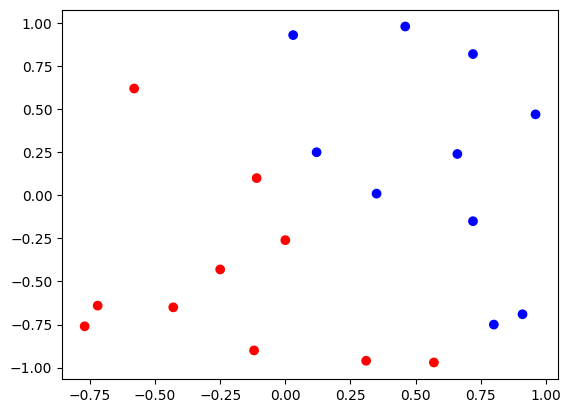

In [8]:
plt.scatter(df['x0'], df['x1'], c = ['r' if i==1 else 'b' for i in df['y']])
# Plot the black line, that is, we want to learn the black line as faithfully as possible
# plt.plot([0.77, -0.55], [-1, 1], color='k', linestyle='-', linewidth=1)

### Steps:
1. Initialize random weights (w and bias)
2. Iterate from 1 to epochs
3. ----Iterate for all points in data (x)
4. --------**Predict** the current point  (**ypredicted = w0x0 + w1x1 + bias**)
5. --------If successfully predicted, go to 7
6. --------If not successfully predicted,  **update weights and bias**
7. --------Next point, go to 4
8. ----If all points predicted correctly, break
9. ----Next iteration

In [9]:
# ypredicted = w0x0 + w1x1 + bias
def predict(point, w, bias, threshold):
    sum = bias

    for j in range(0,len(point)-1):
        sum += point[j] * w[j]

    if sum > threshold:
        y = 1
    else:
        y = -1

    return y

In [10]:
# weight = weight + (learning rate) * x * yactual
# bias = bias + (learning rate) * yactual
def updateWeights(point, w, bias):
    for j in range (0,len(w)):
        w[j] = w[j] + (learning_rate * point[2] * point[j])

    bias = bias + learning_rate * point[2]
    return w, bias

*The Single-layer Perceptron settings - The Weights are initialized as zeros, the Threshold and Bias are respectively set to 0 and 1*

In [11]:
w = [0,0]  # Weights
bias = 1
threshold = 0

learning_rate = 1
max_epochs = 100

In [12]:
print('Starting weights: ', str(w))
for k in range(1, max_epochs):
    hits = 0
    print("\n------------------------- EPOCH "+str(k)+" ------------------------- ")
    for i in range(0,len(x)):
        correctlyPredicted = False
        printStr = "Point "+ str(i) + ":" +str(x[i]) + " Weights:"+str(w)+ ' Bias:' + str(bias)
        ypredicted = predict(x[i], w, bias, threshold)

        # Update the Weights if the output does not match with the Desired output
        if ypredicted == x[i][2]:  # e.g. if  x[0] = [0.72,0.82,-1]... then x[0][2] is the yactual
            hits += 1
            correctlyPredicted = True
            print(printStr + " Correctly classified")
        else:
            print(printStr + " Incorrectly classified")
            w, bias = updateWeights(x[i], w, bias)
            print('Updated weights: ', str(w), "  Updated bias:", bias)

    if hits == len(x):
        print("\n---------------------------------------------------------------")
        print("\nFunctionality learned with "+str(k)+" iterations!")
        break;
    else:
        print("\n---------------------------------------------------------------")
        print("\nFunctionality not learned!")

print("\nDone!\n")

Starting weights:  [0, 0]

------------------------- EPOCH 1 ------------------------- 
Point 0:[0.72, 0.82, -1] Weights:[0, 0] Bias:1 Incorrectly classified
Updated weights:  [-0.72, -0.82]   Updated bias: 0
Point 1:[0.91, -0.69, -1] Weights:[-0.72, -0.82] Bias:0 Correctly classified
Point 2:[0.03, 0.93, -1] Weights:[-0.72, -0.82] Bias:0 Correctly classified
Point 3:[0.12, 0.25, -1] Weights:[-0.72, -0.82] Bias:0 Correctly classified
Point 4:[0.96, 0.47, -1] Weights:[-0.72, -0.82] Bias:0 Correctly classified
Point 5:[0.8, -0.75, -1] Weights:[-0.72, -0.82] Bias:0 Incorrectly classified
Updated weights:  [-1.52, -0.06999999999999995]   Updated bias: -1
Point 6:[0.46, 0.98, -1] Weights:[-1.52, -0.06999999999999995] Bias:-1 Correctly classified
Point 7:[0.66, 0.24, -1] Weights:[-1.52, -0.06999999999999995] Bias:-1 Correctly classified
Point 8:[0.72, -0.15, -1] Weights:[-1.52, -0.06999999999999995] Bias:-1 Correctly classified
Point 9:[0.35, 0.01, -1] Weights:[-1.52, -0.06999999999999995] B

In [13]:
w, bias

([-2.64, -1.72], 0)

### Adding the scatter plot at each step to see the progress:
1. Initialize random weights and based on that draw the classification line
2. Iterate from 1 to max_iterations
3. ----Iterate for all points in data
4. --------**Predict** the current point
5. --------If successfully predicted, **plot graph**, go to 7
6. --------If not successfully predicted,  **update weights**, **plot graph**
7. --------Next point, go to 4
8. ----If all points predicted correctly, break
9. ----Next iteration

In [ ]:
def createPlot(point, w, bias, correctlyPredicted):
    plt.clf() # Clear figure
    plt.title('Iteration %s\n' % (str(k)))
    plt.grid(False) # Plot a grid
    plt.xlim(-1,1) # Set x-axis limits
    plt.ylim(-1,1) # Set y-axis limits

    plotLearningLine = True
    # ax + by + c = 0   => w[0]*x + w[1]*y + bias = 0 ---- from the slides.... a is w[0], b is w[1], c is bias
    if w[1] != 0:
        xA = 1
        xB = -1
        yA = (- w[0] * xA - bias) / w[1]
        yB = (- w[0] * xB - bias) / w[1]
    elif (w[0] !=0):
        yA = 1
        yB = -1
        xA = (- w[1] * yA - bias) / w[0]
        xB = (- w[1] * yB - bias) / w[0]
    else:
        print("Not plotting the Learning line")
        plotLearningLine = False

    # Plot the black line, that is, we want to learn the black line as faithfully as possible
    plt.plot([0.77, -0.55], [-1, 1], color='k', linestyle='-', linewidth=1)


    if plotLearningLine:
        plt.plot([xA, xB], [yA, yB], color='g', linestyle='-', linewidth=2)  # Learning line (Decision Boundary)

    #plt.plot(x0blue, x1blue, 'bo')  # Plot blue points
    #plt.plot(x0red, x1red, 'ro')    # Plot red points
    plt.scatter(df['x0'], df['x1'], c=['r' if i==1 else 'b' for i in df['y']])
    if correctlyPredicted:
        plt.plot(point[0], point[1], 'go', markersize=15, alpha=.5)  # Highlight current point with with green color
    else:
        plt.plot(point[0], point[1], 'mo', markersize=30, alpha=.5)  # Highlight current point with magenta color

    plt.show()
    plt.pause(0.05) # We were able to control the loop time, so a figure will be updated and displayed


In [ ]:
w = [0,0]  # Weights
bias = 1
threshold = 0

learning_rate = 1
max_epoch = 100
needPlot = True

In [ ]:
# Turn on the interactive graphics mode
# plt.ion()

In [ ]:
for k in range(1, max_epochs):
    hits = 0
    print("\n------------------------- EPOCH "+str(k)+" ------------------------- ")
    for i in range(0,len(x)):
        correctlyPredicted = False
        printStr = "Point "+ str(i) + ":" +str(x[i]) + " Weights:"+str(w)
        y = predict(x[i], w, bias, threshold)
        #  x[0] = [0.72,0.82,-1]
        # Update the Weights if the output does not match with the Desired output
        if y == x[i][2]:  # x[0][2]
            hits += 1
            correctlyPredicted = True
            print(printStr + " Correctly classified")
            if needPlot:
                createPlot(x[i], w, bias, correctlyPredicted)
        else:
            print(printStr + " Incorrectly classified")
            if needPlot:
                createPlot(x[i], w, bias, correctlyPredicted)
            w, bias = updateWeights(x[i], w, bias)
            print('Updated weights: ', str(w))

    if hits == len(x):
        print("\n---------------------------------------------------------------")
        print("\nFunctionality learned with "+str(k)+" iterations!")
        break;
    else:
        print("\n---------------------------------------------------------------")
        print("\nFunctionality not learned!")

print("\nDone!\n")

### Logistic regression Loss function and Gradients:
\begin{equation*} Log Loss = - \sum y_i log(p_i) + (1-y_i) log(1 - p_i)\end{equation*}
* *The derivative(slope/gradient) for Loss function of Logistic Regression is:*    **x * (ypredicted - yactual)**
* *The weight will then be upated as:*    **weight = weight - learningRate * gradient**
* *Thus,* **weight = weight - learning rate *  x * (ypredicted - yactual)**

**weight = weight - learning rate *  x * (ypredicted - yactual)**

For the perceptron, we update the weights only when 'ypredicted' is not equal to 'yactual'
* In our example above, 'yactual' can be either -1 or +1
* So, ypredicted - yacutal = -yactual - yactual = -2* yactual
* Therefore, weight = weight - (learning rate) *  x* (-2)* yacutal = weight + 2* (learning rate) * x * yactual
* Or, weight = weight + (learning rate) * x * yactual

Similarly, [bias = bias - (learning rate) *  (predictions - actual)]  becomes
* bias = bias + (learning rate) * actual

In [ ]:
# The derivative(slope/gradient) for Loss function of Logistic Regression is:
#    weight = weight - learning rate *  x * (predictions - actual)
#    We update the weights only when 'prediction' is not equal to 'actual' -- and since 'actual' can be either -1 or +1
#                    prediction - acutal = -actual - actual = -2*actual
#    So our formula [weight = weight - learning rate *  x*(predictions - actual)] becomes
#                    weight = weight - learning rate *  x*(-2)*acutal
#                           = weight + 2*learning rate * x * actual
#    And bias formula [bias = bias - learning rate *  (predictions - actual)] becomes
#                      bias = bias - learning rate * (-2)*acutal
#                           = bias + 2*learning rate * actual

In [ ]:
# x0red = df[df['y'] == 1]['x0']
# x1red = df[df['y'] == 1]['x1']

# x0red = [row[0] for row in x if row[2] == 1]
# x1red = [row[1] for row in x if row[2] == 1]
# x0blue = [row[0] for row in x if row[2] == -1]
# x1blue = [row[1] for row in x if row[2] == -1]
# # x0red, x1red, x0blue, x1blue
# plt.scatter(x0red, x1red, c='r')
# plt.scatter(x0blue, x1blue, c='b')

In [ ]:
# Data Dictionary
data_dictionary = {
    # 'Keys' : 'Values',
    '0.72,0.82' : '-1',
    '0.91,-0.69' : '-1',
    '0.03,0.93' : '-1',
    '0.12,0.25' : '-1',
    '0.96,0.47' : '-1',
    '0.8,-0.75' : '-1',
    '0.46,0.98' : '-1',
    '0.66,0.24' : '-1',
    '0.72,-0.15' : '-1',
    '0.35,0.01' : '-1',
    '-0.11,0.1' : '1',
    '0.31,-0.96' : '1',
    '0.0,-0.26' : '1',
    '-0.43,-0.65' : '1',
    '0.57,-0.97' : '1',
    '-0.72,-0.64' : '1',
    '-0.25,-0.43' : '1',
    '-0.12,-0.9' : '1',
    '-0.58,0.62' : '1',
    '-0.77,-0.76' : '1'
}


#**Helper-function for plotting red and blue points**

Stores the x and y coordinates for each point of the graph in their respective vectors.

In [ ]:
def get_points_of_color(data, label):
    x_coords = [float(point.split(",")[0]) for point in data.keys() if data[point] == label]
    y_coords = [float(point.split(",")[1]) for point in data.keys() if data[point] == label]
    return x_coords, y_coords

In [ ]:
xr,yr = get_points_of_color(data_dictionary, '1')
xb,yb = get_points_of_color(data_dictionary, '-1')
xr,yr,xb,yb

In [ ]:
#the function to turn on interactive mode
plt.ion()

#creating randomly generate collections/data
random_array = np.arange(-4, 5)
collection_1 = random_array ** 2
collection_2 = 10 / (random_array ** 2 + 1)
figure, axes = plt.subplots()
axes.plot(random_array, collection_1,
          'rx', random_array,
          collection_2, 'b+',
          linestyle='solid')
axes.fill_between(random_array,
                  collection_1,
                  collection_2,
                  where=collection_2>collection_1,
                  interpolate=True,
                  color='green', alpha=0.3)

lgnd = axes.legend(['collection-1',
                    'collection-2'],
                   loc='upper center',
                   shadow=True)

lgnd.get_frame().set_facecolor('#ffb19a')

In [ ]:

plt.ion()
plt.plot([1.4, 2.5])
plt.title(" Sampple interactive plot")

axes = plt.gca()
axes.plot([3.1, 2.2])


In [ ]:

plt.ion()
plt.plot([1.4, 2.5])
plt.title(" Sampple interactive plot")
plt.plot([3.1, 2.2])